<div class="jumbotron text-left"><b>
    
This tutorial describes how to use the SMT toolbox to do some Bayesian Optimization (EGO method) to solve unconstrained optimization problem
<div>
    
Rémy Priem and Nathalie BARTOLI ONERA/DTIS/M2CI - April 2020

<p class="alert alert-success" style="padding:1em">
To use SMT models, please follow this link : https://github.com/SMTorg/SMT/blob/master/README.md. The documentation is available here: http://smt.readthedocs.io/en/latest/
</p>

The reference paper is available 
here https://www.sciencedirect.com/science/article/pii/S0965997818309360?via%3Dihub 

or as a preprint: http://mdolab.engin.umich.edu/content/python-surrogate-modeling-framework-derivatives

 ## Use the EGO from SMT 

In [146]:
import numpy as np 

import matplotlib.pyplot as plt
from smt.applications.egop import EGO_para
from smt.sampling_methods import LHS
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* Choose your criterion to perform the optimization: EI, SBO or UCB
* Choose the size of the initial DOE
* Choose the number of EGO iterations

## Try with a 2D function : 2D Rosenbrock function 

Rosenbrock Function  in dimension N

$$
f(\mathbf{x}) = \sum_{i=1}^{N-1} 100 (x_{i+1} - x_i^2 )^2 + (1-x_i)^2 \quad \mbox{where} \quad \mathbf{x} = [x_1, \ldots, x_N] \in \mathbb{R}^N.
$$

$$x_i \in [-2,2]$$

In [147]:
#define the rosenbrock function
def rosenbrock(x):
    """
    Evaluate objective and constraints for the Rosenbrock test case:
    """
    n,dim = x.shape

    #parameters:
    Opt =[]
    Opt_point_scalar = 1
    #construction of O vector
    for i in range(0, dim):
        Opt.append(Opt_point_scalar)

    #Construction of Z vector
    Z= np.zeros((n,dim))
    for i in range(0,dim):
        Z[:,i] = (x[:,i]-Opt[i]+1)

    #Sum
    sum1 = np.zeros((n,1))
    for i in range(0,dim-1):
        sum1[:,0] += 100*(((Z[:,i]**2)-Z[:,i+1])**2)+((Z[:,i]-1)**2)

    return sum1


xlimits=np.array([[-2,2], [-2,2]])

<IPython.core.display.Javascript object>


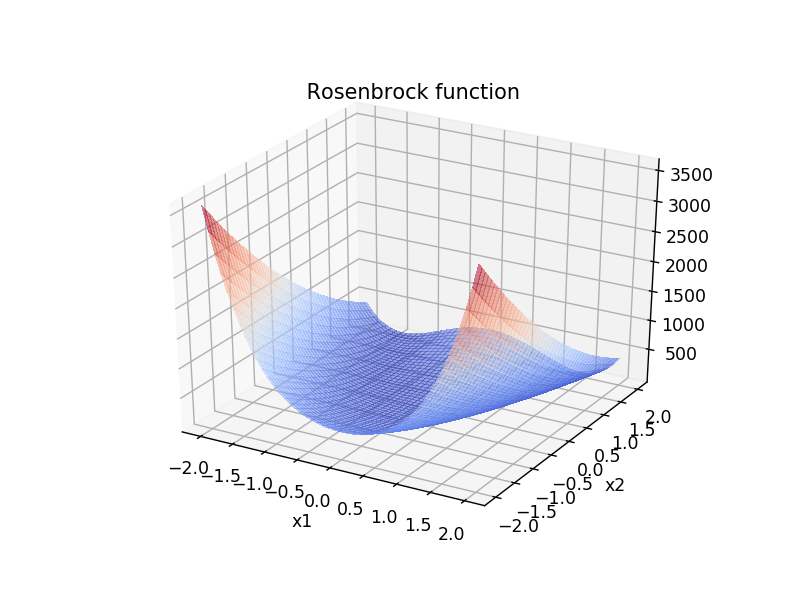

In [148]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#To plot the Rosenbrock function
num_plot = 50 #to plot rosenbrock
x = np.linspace(xlimits[0][0],xlimits[0][1],num_plot)
res = []
for x0 in x:
    for x1 in x:
        res.append(rosenbrock(np.array([[x0,x1]])))
res = np.array(res)
res = res.reshape((50,50)).T
X,Y = np.meshgrid(x,x)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, res, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)
plt.title(' Rosenbrock function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [149]:
criterion='EI' #'EI' or 'SBO' or 'UCB'

#number of points in the initial DOE
ndoe = 11 #(at least ndim+1)

#number of iterations with EGO 
n_iter =5

#Build the initial DOE
sampling = LHS(xlimits=xlimits)
xdoe = sampling(ndoe)


#EGO call
ego = EGO_para(n_iter=n_iter, criterion=criterion, xdoe=xdoe, xlimits=xlimits, verbose=True, n_par=3)

x_opt, y_opt, ind_best, x_data, y_data, x_doe, y_doe = ego.optimize(fun=rosenbrock)

print('Xopt for Rosenbrock ', x_opt,y_opt, ' obtained using EGO-p = ', criterion )
print('Check if the optimal point is Xopt= (1,1) with the Y value=0')
print('---------------------------')


Initial DOE given
	 Parallele evaluation of 11 fun(s)
Internal optimization succeeded at EGO iter = 0.0
Internal optimization succeeded at EGO iter = 0.1
Internal optimization succeeded at EGO iter = 0.2
	 Parallele evaluation of 3 fun(s)
Internal optimization succeeded at EGO iter = 1.0
Internal optimization succeeded at EGO iter = 1.1
Internal optimization succeeded at EGO iter = 1.2
	 Parallele evaluation of 3 fun(s)
Internal optimization succeeded at EGO iter = 2.0
Internal optimization succeeded at EGO iter = 2.1
Internal optimization succeeded at EGO iter = 2.2
	 Parallele evaluation of 3 fun(s)
Internal optimization succeeded at EGO iter = 3.0
Internal optimization succeeded at EGO iter = 3.1
Internal optimization succeeded at EGO iter = 3.2
	 Parallele evaluation of 3 fun(s)
Internal optimization succeeded at EGO iter = 4.0
Internal optimization succeeded at EGO iter = 4.1
Internal optimization succeeded at EGO iter = 4.2
	 Parallele evaluation of 3 fun(s)
Xopt for Rosenbrock  

In [172]:
y_data

array([[1.20008264e+02],
       [2.26674414e+03],
       [3.12998361e+02],
       [2.29238508e+02],
       [7.97410696e+01],
       [3.67633427e+02],
       [3.72669217e+01],
       [4.47826310e+02],
       [1.13659586e+01],
       [5.53874804e+02],
       [1.50012226e+02],
       [5.04104408e+00],
       [4.62514130e+01],
       [2.05365598e+00],
       [1.08857470e-01],
       [5.93725208e+00],
       [6.19923414e+00],
       [1.20245794e+00],
       [4.44860210e+00],
       [5.38725568e+01],
       [5.01162873e+01],
       [2.02732922e+02],
       [5.17417271e+00],
       [4.15009376e+01],
       [1.46726115e+01],
       [1.67898012e+02]])

<IPython.core.display.Javascript object>


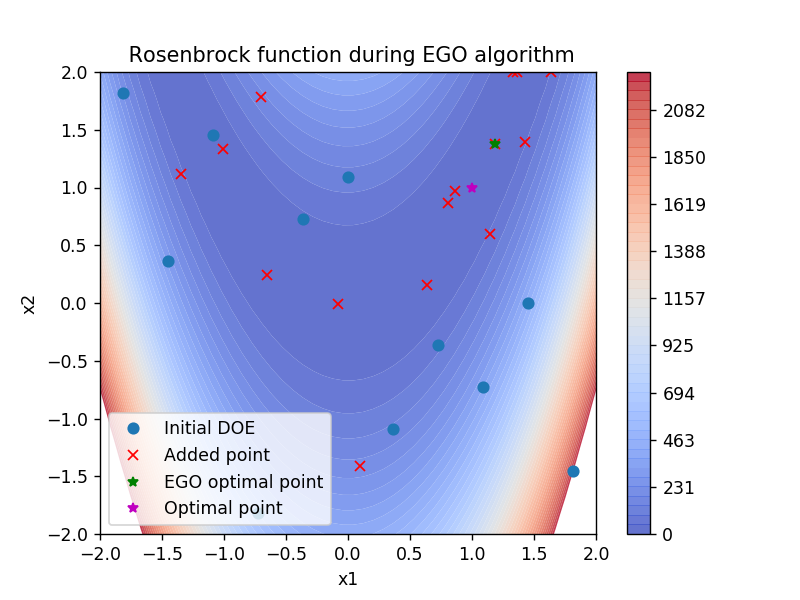

In [179]:
#2D plot 
#to add the points provided by EGO-p
fig = plt.figure()
cont = plt.contourf(X, Y, res, cmap=cm.coolwarm,
             antialiased=True,
             levels=np.linspace(0,np.max(y_data),50),
             alpha=0.8)
plt.plot(x_doe[:,0],x_doe[:,1],'o', label='Initial DOE')
plt.plot(x_data[ndoe:,0],x_data[ndoe:,1],'x', c='r', label='Added point')
plt.plot(x_opt[0],x_opt[1],'*',c='g', label= 'EGO optimal point')
plt.plot(1, 1,'*',c='m', label= 'Optimal point')
plt.colorbar(cont)
plt.title(' Rosenbrock function during EGO algorithm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()